In [3]:
#Importing necessary libraries and loading the Fashion MNIST dataset

from keras.models import Model
from keras.layers import Input, Dense
import numpy as np
import pandas as pd
import keras.backend as K
import matplotlib.pyplot as plt
from keras import preprocessing
from keras.models import Sequential
from keras.layers import Conv2D, Dropout, Dense, Flatten, Conv2DTranspose, BatchNormalization, LeakyReLU, Reshape
import tensorflow as tf
from keras.layers import *
from keras.datasets import fashion_mnist

(train_x, train_y), (val_x, val_y) = fashion_mnist.load_data()
train_x = train_x / 255.
val_x = val_x / 255.
train_x = train_x.reshape(-1, 28, 28, 1)

print(train_x.shape)


C:\Users\Kajal_Khatri\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


(60000, 28, 28, 1)


1.0 -1.0


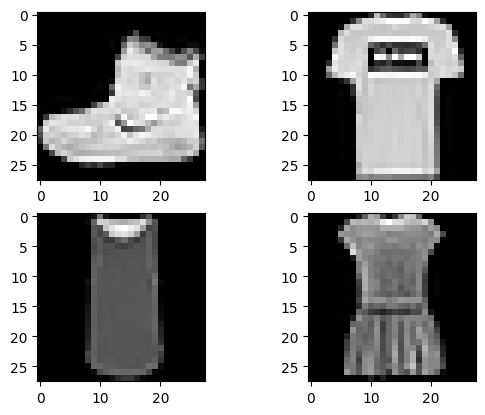

In [4]:
#Visualizing a sample of the training data before normalization

fig, axe = plt.subplots(2, 2)
idx = 0

for i in range(2):
    for j in range(2):
        axe[i, j].imshow(train_x[idx].reshape(28, 28), cmap='gray')
        idx += 1

train_x = train_x * 2 - 1

print(train_x.max(), train_x.min())


In [5]:
# Defining the generator model

generator = Sequential()
generator.add(Dense(512, input_shape=[100]))
generator.add(LeakyReLU(alpha=0.2))
generator.add(BatchNormalization(momentum=0.8))
generator.add(Dense(256))
generator.add(LeakyReLU(alpha=0.2))
generator.add(BatchNormalization(momentum=0.8))
generator.add(Dense(128))
generator.add(LeakyReLU(alpha=0.2))
generator.add(BatchNormalization(momentum=0.8))
generator.add(Dense(784))
generator.add(Reshape([28, 28, 1]))

generator.summary()


C:\Users\Kajal_Khatri\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\Kajal_Khatri\anaconda3\Lib\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape          ┃      Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━┩
│ dense (Dense)                 │ (None, 512)           │       51,712 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ leaky_re_lu (LeakyReLU)       │ (None, 512)           │            0 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ batch_normalization           │ (None, 512)           │        2,048 │
│ (BatchNormalization)          │                       │              │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ dense_1 (Dense)               │ (None, 256)           │      131,328 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ leaky_re_lu_1 (LeakyReLU)     │ (None, 256)           │            0 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ batch_normalization_1         │ (None, 256)           │        1,024 │
│ (BatchNormalization)          │                       │              │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ dense_2 (Dense)               │ (None, 128)           │       32,896 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ leaky_re_lu_2 (LeakyReLU)     │ (None, 128)           │            0 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ batch_normalization_2         │ (None, 128)           │          512 │
│ (BatchNormalization)          │                       │              │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ dense_3 (Dense)               │ (None, 784)           │      101,136 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ reshape (Reshape)             │ (None, 28, 28, 1)     │            0 │
└───────────────────────────────┴───────────────────────┴──────────────┘

 Total params: 320,656 (1.22 MB)

 Trainable params: 318,864 (1.22 MB)

 Non-trainable params: 1,792 (7.00 KB)

In [6]:
#Defining the discriminator model

discriminator = Sequential()
discriminator.add(Dense(1, input_shape=[28, 28, 1]))
discriminator.add(Flatten())
discriminator.add(Dense(256))
discriminator.add(LeakyReLU(alpha=0.2))
discriminator.add(Dropout(0.5))
discriminator.add(Dense(128))
discriminator.add(LeakyReLU(alpha=0.2))
discriminator.add(Dropout(0.5))
discriminator.add(Dense(64))
discriminator.add(LeakyReLU(alpha=0.2))
discriminator.add(Dropout(0.5))
discriminator.add(Dense(1, activation='sigmoid'))

discriminator.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape          ┃      Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━┩
│ dense_4 (Dense)               │ (None, 28, 28, 1)     │            2 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ flatten (Flatten)             │ (None, 784)           │            0 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ dense_5 (Dense)               │ (None, 256)           │      200,960 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ leaky_re_lu_3 (LeakyReLU)     │ (None, 256)           │            0 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ dropout (Dropout)             │ (None, 256)           │            0 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ dense_6 (Dense)               │ (None, 128)           │       32,896 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ leaky_re_lu_4 (LeakyReLU)     │ (None, 128)           │            0 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ dropout_1 (Dropout)           │ (None, 128)           │            0 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ dense_7 (Dense)               │ (None, 64)            │        8,256 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ leaky_re_lu_5 (LeakyReLU)     │ (None, 64)            │            0 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ dropout_2 (Dropout)           │ (None, 64)            │            0 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ dense_8 (Dense)               │ (None, 1)             │           65 │
└───────────────────────────────┴───────────────────────┴──────────────┘

 Total params: 242,179 (946.01 KB)

 Trainable params: 242,179 (946.01 KB)

 Non-trainable params: 0 (0.00 B)

In [7]:
# Combining the generator and discriminator into a GAN model

GAN = Sequential([generator, discriminator])
discriminator.compile(optimizer='adam', loss='binary_crossentropy')
discriminator.trainable = False
GAN.compile(optimizer='adam', loss='binary_crossentropy')

GAN.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape          ┃      Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━┩
│ sequential (Sequential)       │ ?                     │      320,656 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ sequential_1 (Sequential)     │ ?                     │      242,179 │
└───────────────────────────────┴───────────────────────┴──────────────┘

 Total params: 562,835 (2.15 MB)

 Trainable params: 318,864 (1.22 MB)

 Non-trainable params: 243,971 (953.01 KB)

In [ ]:
# Training the GAN model

epochs = 30
batch_size = 100
noise_shape = 100

with tf.device('/gpu:0'):
    for epoch in range(epochs):
        print(f"Currently on Epoch {epoch+1}")

        for i in range(train_x.shape[0] // batch_size):
            if (i+1) % 100 == 0:
                print(f"\tCurrently on batch number {i+1} of {train_x.shape[0] // batch_size}")

            noise = np.random.normal(size=[batch_size, noise_shape])
            gen_image = generator.predict_on_batch(noise)
            train_dataset = train_x[i * batch_size:(i+1) * batch_size]
            train_label = np.ones(shape=(batch_size, 1))

            discriminator.trainable = True
            d_loss_real = discriminator.train_on_batch(train_dataset, train_label)
            train_label = np.zeros(shape=(batch_size, 1))
            d_loss_fake = discriminator.train_on_batch(gen_image, train_label)

            noise = np.random.normal(size=[batch_size, noise_shape])
            train_label = np.ones(shape=(batch_size, 1))
            discriminator.trainable = False
            d_g_loss_batch = GAN.train_on_batch(noise, train_label)


Currently on Epoch 1
	Currently on batch number 100 of 600
	Currently on batch number 200 of 600


In [ ]:
# Visualizing generated images

# Plotting generated images at the start and then after every 10 epochs
if epoch % 10 == 0:
    samples = 10
    x_fake = generator.predict(np.random.normal(loc=0, scale=1, size=(samples, 100)))

    for k in range(samples):
        plt.subplot(2, 5, k+1)
        plt.imshow(x_fake[k].reshape(28, 28), cmap='gray')
        plt.xticks([])
        plt.yticks([])

    plt.tight_layout()
    plt.show()

print('Training is complete')

# Visualizing the noise and generated images
noise = np.random.normal(size=[10, noise_shape])
gen_image = generator.predict(noise)
plt.imshow(noise)
plt.title('How the noise looks')

fig, axe = plt.subplots(2, 5)
fig.suptitle('Generated Images from Noise using GANs')
idx = 0

for i in range(2):
    for j in range(5):
        axe[i, j].imshow(gen_image[idx].reshape(28, 28), cmap='gray')
        idx += 1
